# Import các thư viện


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Đọc dữ liệu


In [ ]:
df = pd.read_csv("../../Data/Created Data/hotel_bookings_added_revenue.csv")
df


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent,revenue
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,3,0,0.00,0,0,Europe,0.00
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,4,0,0.00,0,0,Europe,0.00
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,0,0,0,0,75.00,0,0,Europe,75.00
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,0,0,0,0,75.00,0,0,Europe,75.00
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,98.00,0,1,Europe,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87360,2017-08-30,2017-09-06,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,...,0,0,0,0,0,96.14,0,0,Europe,672.98
87361,2017-08-31,2017-09-07,City Hotel,BB,FRA,Online TA,TA/TO,E,E,No Deposit,...,0,0,0,0,0,225.43,0,2,Europe,1578.01
87362,2017-08-31,2017-09-07,City Hotel,BB,DEU,Online TA,TA/TO,D,D,No Deposit,...,0,0,0,0,0,157.71,0,4,Europe,1103.97
87363,2017-08-31,2017-09-07,City Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,104.40,0,0,Europe,730.80


# chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [ ]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


# I TỔNG QUAN VỀ TÌNH HÌNH ĐẶT PHÒNG KHÁCH SẠN LOẠI "CITY"


## 1. Tỷ lệ đặt phòng chia theo khách nội địa và quốc tế


In [ ]:
# create a new df with only avaiable data (OMIT UNDEFINED)
hotel_data = df[df["country"] != "undefined"]
city_hotel_data = hotel_data[hotel_data["hotel"] == "Resort Hotel"]

internal_customers = city_hotel_data[city_hotel_data["country"] == "PRT"]
foreign_customers = city_hotel_data[city_hotel_data["country"] != "PRT"]

total_customers = len(city_hotel_data)
internal_percentage = len(internal_customers) / total_customers * 100
foreign_percentage = len(foreign_customers) / total_customers * 100

internal_percentage, foreign_percentage


(42.46023456384852, 57.53976543615148)

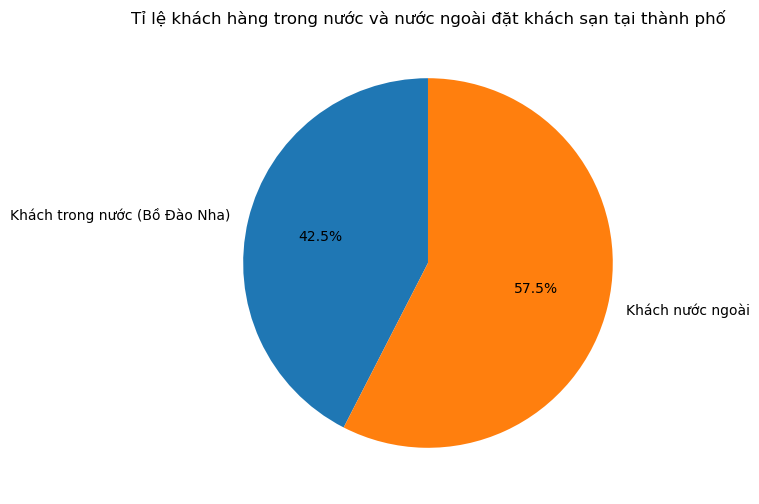

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(
    [internal_percentage, foreign_percentage],
    labels=["Khách trong nước (Bồ Đào Nha)", "Khách nước ngoài"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Tỉ lệ khách hàng trong nước và nước ngoài đặt khách sạn tại thành phố")
plt.show()


**Nhận xét**:
Cân bằng giữa hai loại khách => xu hướng cả 2 loại khách đều thích Resort....
-:
...


## 2. Tỷ lệ khách quốc tế đặt phòng


In [ ]:
foreign_nationalities = foreign_customers["country"].value_counts()

foreign_nationalities_percentage = (
    foreign_nationalities / len(foreign_customers)
) * 100

# top 10 highest countries
top_countries = foreign_nationalities_percentage.head(10)

top_countries


GBR    30.615632
ESP    17.981432
IRL    10.103210
FRA     7.390696
DEU     4.771537
CN      3.122245
NLD     2.489497
USA     2.375395
ITA     2.173124
CHE     2.152378
Name: country, dtype: float64

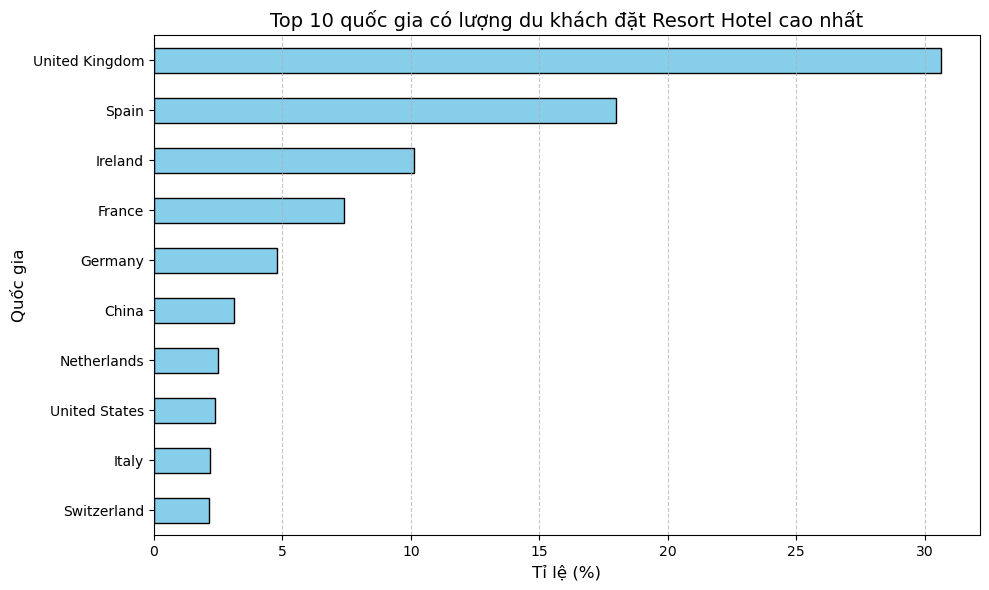

In [ ]:
# top 10 countries with highest percentage of foreign customers
plt.figure(figsize=(10, 6))
top_10_countries = top_countries.sort_values(ascending=True).tail(10)
top_10_countries.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")

mapping = {
    "GBR": "United Kingdom",
    "FRA": "France",
    "DEU": "Germany",
    "ESP": "Spain",
    "ITA": "Italy",
    "IRL": "Ireland",
    "BEL": "Belgium",
    "BRA": "Brazil",
    "NLD": "Netherlands",
    "USA": "United States",
    "CHE": "Switzerland",
    "CN": "China",
}
plt.yticks(
    ticks=range(10),
    labels=[mapping.get(country, country) for country in top_10_countries.index],
)

plt.title("Top 10 quốc gia có lượng du khách đặt Resort Hotel cao nhất", fontsize=14)
plt.xlabel("Tỉ lệ (%)", fontsize=12)
plt.ylabel("Quốc gia", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


**Nhận xét**:
Trong top 10 quốc gia đặt phòng thì có CN (quốc gia châu Á), thể hiện loại hình khách sạn Resort được nhiều du khách từ đa dạng châu lục hơn so với City, vì..., đề xuất,...


## 3. Doanh thu phân theo loại khách đặt phòng


In [ ]:
# raw number of bookings and percentages
total_bookings = city_hotel_data["customer_type"].value_counts()
percentage_bookings = (total_bookings / total_bookings.sum()) * 100

# total revenue (raw amount) and percentages
total_revenue = city_hotel_data.groupby("customer_type")["revenue"].sum()
percentage_revenue = (total_revenue / total_revenue.sum()) * 100

# all insights into a DataFrame for comparison
detailed_customer_analysis = pd.DataFrame(
    {
        "total_bookings": total_bookings,
        "percentage_bookings": percentage_bookings,
        "total_revenue": total_revenue,
        "percentage_revenue": percentage_revenue,
    }
).sort_values(by="total_revenue", ascending=False)

detailed_customer_analysis


,total_bookings,percentage_bookings,total_revenue,percentage_revenue
Transient,26926,80.354532,12811549.68,82.173843
Transient-Party,4648,13.870900,1560914.42,10.011774
Contract,1668,4.977767,1143182.16,7.332421
Group,267,0.796801,75141.76,0.481963


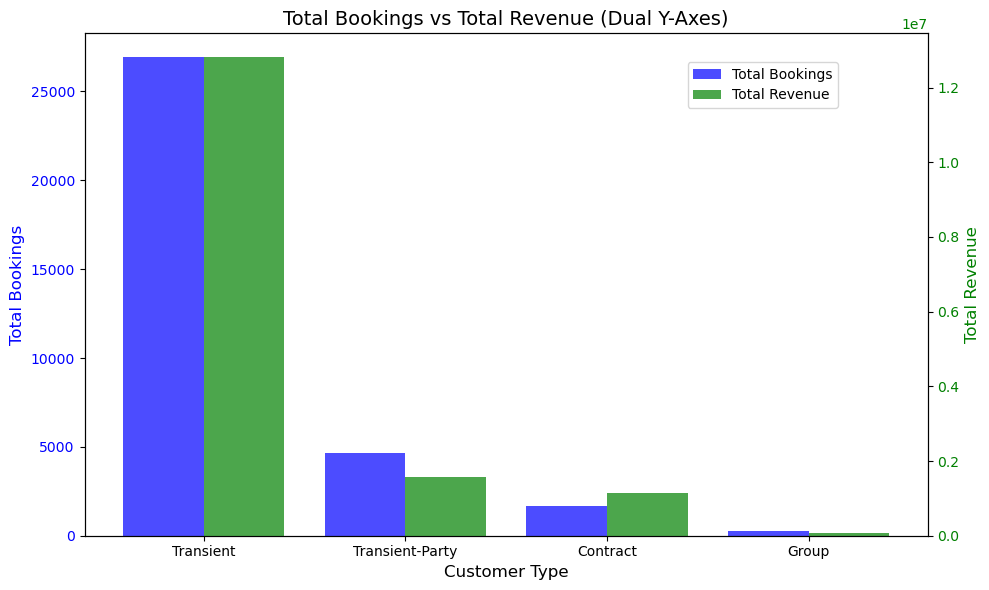

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(detailed_customer_analysis))
bar_width = 0.4
ax1.bar(
    x,
    detailed_customer_analysis["total_bookings"],
    bar_width,
    color="blue",
    alpha=0.7,
    label="Total Bookings",
)
ax1.set_ylabel("Total Bookings", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")

# Y-axis for revenue
ax2 = ax1.twinx()
ax2.bar(
    [p + bar_width for p in x],
    detailed_customer_analysis["total_revenue"],
    bar_width,
    color="green",
    alpha=0.7,
    label="Total Revenue",
)
ax2.set_ylabel("Total Revenue", color="green", fontsize=12)
ax2.tick_params(axis="y", labelcolor="green")

# Labels, title, and legend
ax1.set_xlabel("Customer Type", fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.title("Total Bookings vs Total Revenue (Dual Y-Axes)", fontsize=14)
plt.tight_layout()
plt.show()


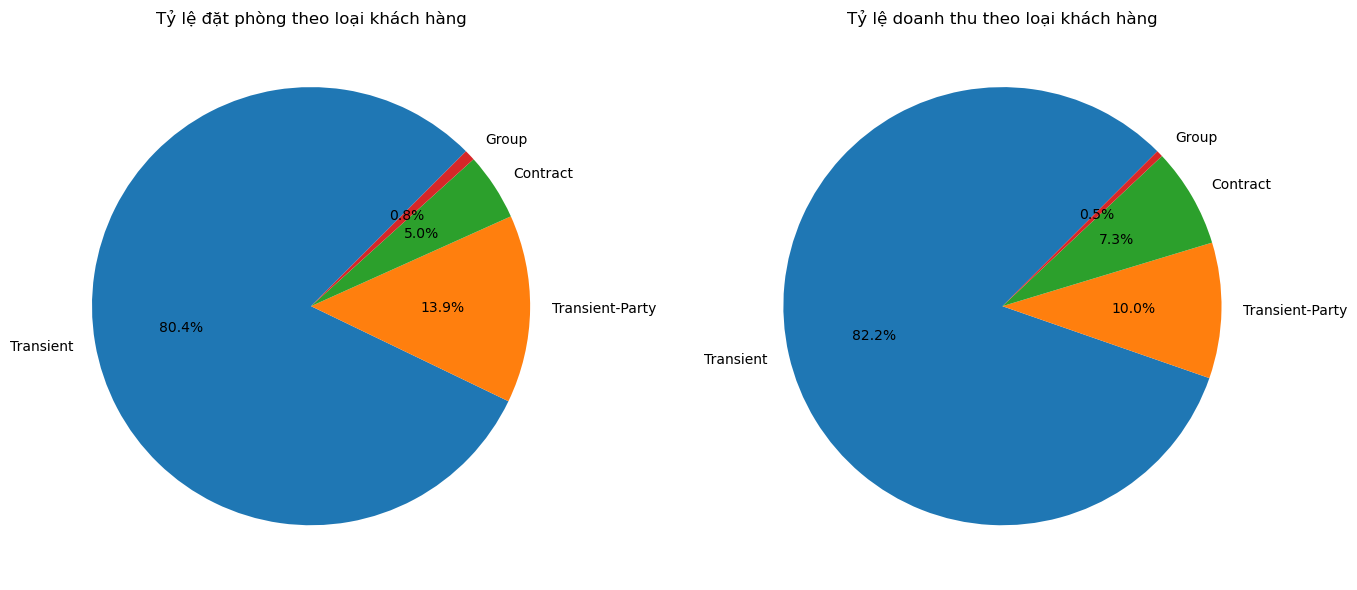

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(
    detailed_customer_analysis["percentage_bookings"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[0].set_title("Tỷ lệ đặt phòng theo loại khách hàng")


ax[1].pie(
    detailed_customer_analysis["percentage_revenue"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[1].set_title("Tỷ lệ doanh thu theo loại khách hàng")

plt.tight_layout()
plt.show()


**Nhận xét**: Khách vãng lai (Transient) tuy chỉ ở thời gian ngắn nhung chiếm số đơn lớn nhất (80.4%), đồng thời đa số doanh thu cũng đến từ nguồn khách này
